[LightGBM] [Info] Number of positive: 192266, number of negative: 239240
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018724 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1532
[LightGBM] [Info] Number of data points in the train set: 431506, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.445570 -> initscore=-0.218587
[LightGBM] [Info] Start training from score -0.218587
XGBoost Hassasiyeti: 0.6954401772388924
              precision    recall  f1-score   support

           0       0.70      0.79      0.74     59879
           1       0.69      0.57      0.63     47998

    accuracy                           0.70    107877
   macro avg       0.69      0.68      0.68    107877
weighted avg       0.69      0.70      0.69    107877

LightGBM Hassasiyeti: 0.6864299155519712
              precision    recall  f1-score   support

           0       0.68      0.81      0.

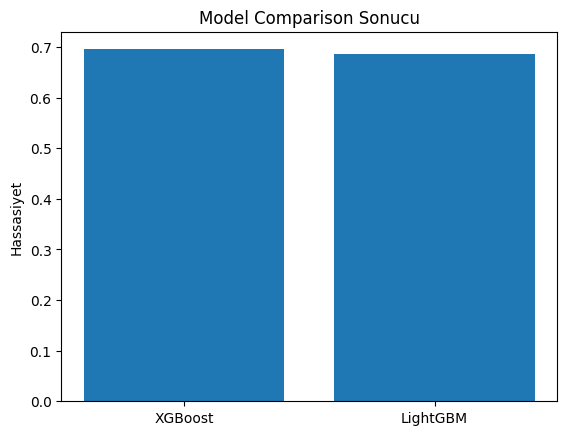

CPU times: total: 22.5 s
Wall time: 6.73 s


In [8]:

%%time
# Gerekli Kütüphaneleri İçe Aktar
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier  
from lightgbm import LGBMClassifier  
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import io

# Veri Setini Yükle ve Oku
data = pd.read_csv(r"D:\users\m_ozdemir15\Desktop\Okul\Y.Lisans\2.Dönem\Makine Öğrenmesi\proje\AirlinesDelayed.csv")
data.head()

# Veri Ön İşleme Adımı

# Eksik değerleri ele al, gerekiyorsa kaldır
data.dropna(inplace=True)

# Kategorik değişkenleri kodla
label_encoders = {}
categorical_columns = ['Airline', 'AirportFrom', 'AirportTo']
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Veriyi X (özellikler) ve y (hedef) olarak böl
X = data.drop('Delay', axis=1)
y = data['Delay']

# Veriyi Eğitim ve Test Kümelerine Ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellik Ölçekleme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# XGBoost için Model Değerlendirmesi  
model_xgb = XGBClassifier()  # XGBoost modelini oluştur
model_xgb.fit(X_train, y_train)  # XGBoost modelini eğit

#LightGBM için Model Seçimi ve Eğitilmesi
model_lgbm = LGBMClassifier()  # LightGBM modeli oluştur
model_lgbm.fit(X_train, y_train)  # LightGBM modeli eğit

# XGBoost için Model Değerlendirmesi
y_pred_xgb = model_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)
print(f'XGBoost Hassasiyeti: {accuracy_xgb}')
print(report_xgb)

# LightGBM için Model Değerlendirmesi
y_pred_lgbm = model_lgbm.predict(X_test)
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
report_lgbm = classification_report(y_test, y_pred_lgbm)
print(f'LightGBM Hassasiyeti: {accuracy_lgbm}')
print(report_lgbm)

# Model Kıyaslaması
models = ['XGBoost', 'LightGBM']
accuracies = [accuracy_xgb, accuracy_lgbm]

plt.bar(models, accuracies)
plt.ylabel('Hassasiyet')
plt.title('Model Karşılaştırma Sonucu')
plt.show()
